# Dimension Reduction and Its Application in Finance

# The curse of dimensionality

As the data size increases, samples become too dispersed in space. The density of the points or the distance between them is very important for many problems. As the data size grows, density and distance information become meaningless and affect the performance of these algorithms.

For instance, let's say we are nearsighted and you need glasses to see around. You wake up one day, but you do not remember where you put your glasses on before you went to sleep last night. Now let's call your glasses:

1. Imagine that you can only put your glasses on a long thin table. The width of the table is only the width of your glasses, and its length is 100 times the length of your glasses. To find your glasses on the table, you need to touch up to 100 areas.<br><br>

2. This time, suppose the table surface is a square and the length of each edge is 100 times the length of your glasses. Now you need to touch 100 ∗ 100 = 10,000 area to find your glasses. We only increased the size of the table from 1 to 2, but in the worst case, the number of areas we should look for increased 100 times!<br><br>

3. Finally, let's consider the table to be 3D. You might think like a cube or even a room full of shelves for storing glasses! If the length of each edge is 100 times the length of your glasses, then, you need to touch 100 ∗ 100 * 100 = 1,000,000 areas! What a dramatic increase!

This example gives you an idea of what the curse of dimensionality is. Informally, we can define the curse of dimensionality as the exponential increase in the number of combinations for a linear increase in the number of dimensions. In the example, when we increase the size of the table from 1 to 2, we saw that the number of areas we should look for increasing from 100 to 10,000. When we increase the size from 2 to 3, the total number of areas increase from 10,000 to one million.

Every variable in our data set is a dimension. So if we run a model with 20 features, we say that the size of our data is 20, and when we have 200 features, the size of the data is 200. Let's simplify things a bit and consider running a model that will find an optimum value for each size. To simplify it further, let's assume that we have only two different values that we can look for in every dimension in the optimization process. So our problem is to find the best of two values for each of the data dimensions. If we have 20 features, the total number of combinations we need to look for is $2^{20}$ = 1048576, and if we have 200 features, the number we should look for $2^{200}$=16069380442589902755419620923411626025222029937827928330301376

Ideally, we may want to include every feature in our data set in our models. But because of the curse of dimensionality, three serious problems limit us:

1. Time required to process the data can increase exponentially when each feature is added to the model. For this reason, running models with many features may be impossible due to the time it needs to be run!<br><br>

2. We use sample data to train our models (you will understand this better when we start discussing supervised learning in bootcamp). However, due to the curse of dimensionality , the number of data points required to develop our models increases exponentially for each feature added to the model. So it may be impossible to find so much data.<br><br>

3. High dimensionality makes it harder and sometimes impossible to visualize our data.

For these three serious reasons, we usually try to limit the number of features in our models. To do this, we need to choose the most useful properties from all the variables in the dataset. Now, let's discuss the general methods used when choosing features. If you want to read more about the curse of dimensionality  before moving on to this topic, start with this [Wikipedia article](https://en.wikipedia.org/wiki/Curse_of_dimensionality).

# Different Approaches to Feature Selection

When choosing a feature, we want to preserve those features that have the highest correlation to the result, as well as prioritize features that bring something unique to the table. Our goal is not only to reduce the options to an ideal feature, but to decide on a set of features that are relatively easy to understand, predictably powerful, minimize overfitting, and are relatively computationally efficient. Feature selection balances out between explanatory power and restrictive model . Fortunately, there are many feature selection algorithms available to help data scientists optimize feature sets.


Feature selection algorithms are divided into four broad groups. Two of them are integrated into the modeling phase, and we will show them not in this part of the bootcamp, but in the next modules where we discuss machine learning algorithms. However, you can easily apply `filter` methods using the techniques we discussed earlier in this section. In this lesson, we will introduce a dimension reduction technique.

## Filtering Methods

Filtering methods evaluate each feature individually, giving them a "score" used to rank the features. Properties that score above a certain value are retained or discarded. The property can be evaluated independently or in conjunction with the result. Variance thresholds, in which only features with variances above a certain limit are held, are an example of evaluating features independently. The correlation of each feature with the result can also be used as a filter method, and we can do this by looking at the correlation table or the `Pearson` correlation matrix.


Filter methods are good at choosing features that are likely to be related to the target variable. These are easy to calculate and are perfectly clear, but they are likely to generate lists of extra features, since inter-feature relationships are not considered. You can use filtering methods as a first pass in reducing features before applying algorithms that require more computation, such as `wrapper` methods, because they are cheap to run.

##  Wrapper Methods

Wrapper methods select sets of features. Different sets are constructed and evaluated in terms of their predictive power in a model, and their performance is compared to the performance of other sets. Wrapper methods differ in terms of how the sets of features are constructed. Two such feature construction methods are **forward passes** and **backward passes**. In forward passes, the algorithm begins with no features and adds features 1-by-1, always adding the feature that results in the highest increase in predictive power and stopping at some predetermined threshold. In backward passes, the algorithm begins with all features and drops features 1-by-1, always dropping the feature with the least predictive power and stopping at some predetermined threshold. Forward and backward pass methods are considered "greedy" because once a feature is added (forward) or removed (backward) it's never again evaluated for the model.

Wrapper methods are good at selecting useful sets of features that effectively predict the outcome. For larger sets of features, however, wrapper methods can be computationally intensive. 

## Embedded methods


Embedded methods also select sets of features, but do so as an intrinsic part of the fitting method for the particular type of model you're using. This may involve *regularization*, where a "complexity penalty" is added to the fitness measures typically used to assess the predictive power of a model. Embedded methods provide the benefits of wrapper methods but are less computationally intensive. Different types of models will use different embedded methods.

##  Dimensionality reduction methods

Another common approach in feature selection is to use dimensionality reduction techniques. These methods are especially useful when we have a lot of features, and applying the techniques we mentioned above might be computationally very expensive. Among the several dimension reduction techniques, one is so popular that every data scientist should know it. It's called **Principal Components Analysis (PCA)** and we discuss it next.

## PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings

In [63]:
fifa_df = pd.read_csv("http://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/fifa.csv")

In [3]:
fifa_df = fifa_df.iloc[:,53:87]
fifa_corr = fifa_df.corr()
fifa_corr

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Crossing,1.000000,0.655300,0.469507,0.809660,0.690339,0.856647,0.833105,0.761107,0.756527,0.840916,...,0.645805,0.575446,0.443101,0.428963,0.409961,-0.663053,-0.660193,-0.659767,-0.660160,-0.662539
Finishing,0.655300,1.000000,0.473427,0.661830,0.882675,0.824337,0.759229,0.697550,0.512806,0.788376,...,0.837827,0.533414,0.024218,-0.033023,-0.071811,-0.588752,-0.587145,-0.583268,-0.584852,-0.586913
HeadingAccuracy,0.469507,0.473427,1.000000,0.640091,0.505639,0.550750,0.440846,0.407772,0.510779,0.658175,...,0.551978,0.507208,0.583123,0.561063,0.533643,-0.750417,-0.749888,-0.746444,-0.744443,-0.748895
ShortPassing,0.809660,0.661830,0.640091,1.000000,0.698309,0.843722,0.775398,0.736659,0.895722,0.911451,...,0.676063,0.685137,0.559576,0.541131,0.508644,-0.729785,-0.728024,-0.724381,-0.723782,-0.728721
Volleys,0.690339,0.882675,0.505639,0.698309,1.000000,0.809639,0.807285,0.749637,0.571050,0.794935,...,0.829257,0.595281,0.120919,0.072788,0.035457,-0.590808,-0.588668,-0.584954,-0.586131,-0.588670
Dribbling,0.856647,0.824337,0.550750,0.843722,0.809639,1.000000,0.842652,0.753600,0.722465,0.938942,...,0.769594,0.597498,0.336072,0.301251,0.273963,-0.754625,-0.753181,-0.749816,-0.751348,-0.754341
Curve,0.833105,0.759229,0.440846,0.775398,0.807285,0.842652,1.000000,0.861277,0.710807,0.829568,...,0.751833,0.616532,0.289529,0.261481,0.232869,-0.606286,-0.603141,-0.600266,-0.603540,-0.604960
FKAccuracy,0.761107,0.697550,0.407772,0.736659,0.749637,0.753600,0.861277,1.000000,0.703544,0.759548,...,0.734440,0.585120,0.297976,0.279153,0.247903,-0.556605,-0.553644,-0.549911,-0.552641,-0.554920
LongPassing,0.756527,0.512806,0.510779,0.895722,0.571050,0.722465,0.710807,0.703544,1.000000,0.788650,...,0.542247,0.645797,0.587106,0.587430,0.562230,-0.596820,-0.594999,-0.591453,-0.591561,-0.595887
BallControl,0.840916,0.788376,0.658175,0.911451,0.794935,0.938942,0.829568,0.759548,0.788650,1.000000,...,0.769791,0.674881,0.452705,0.417566,0.384802,-0.788444,-0.786797,-0.783423,-0.783607,-0.787939


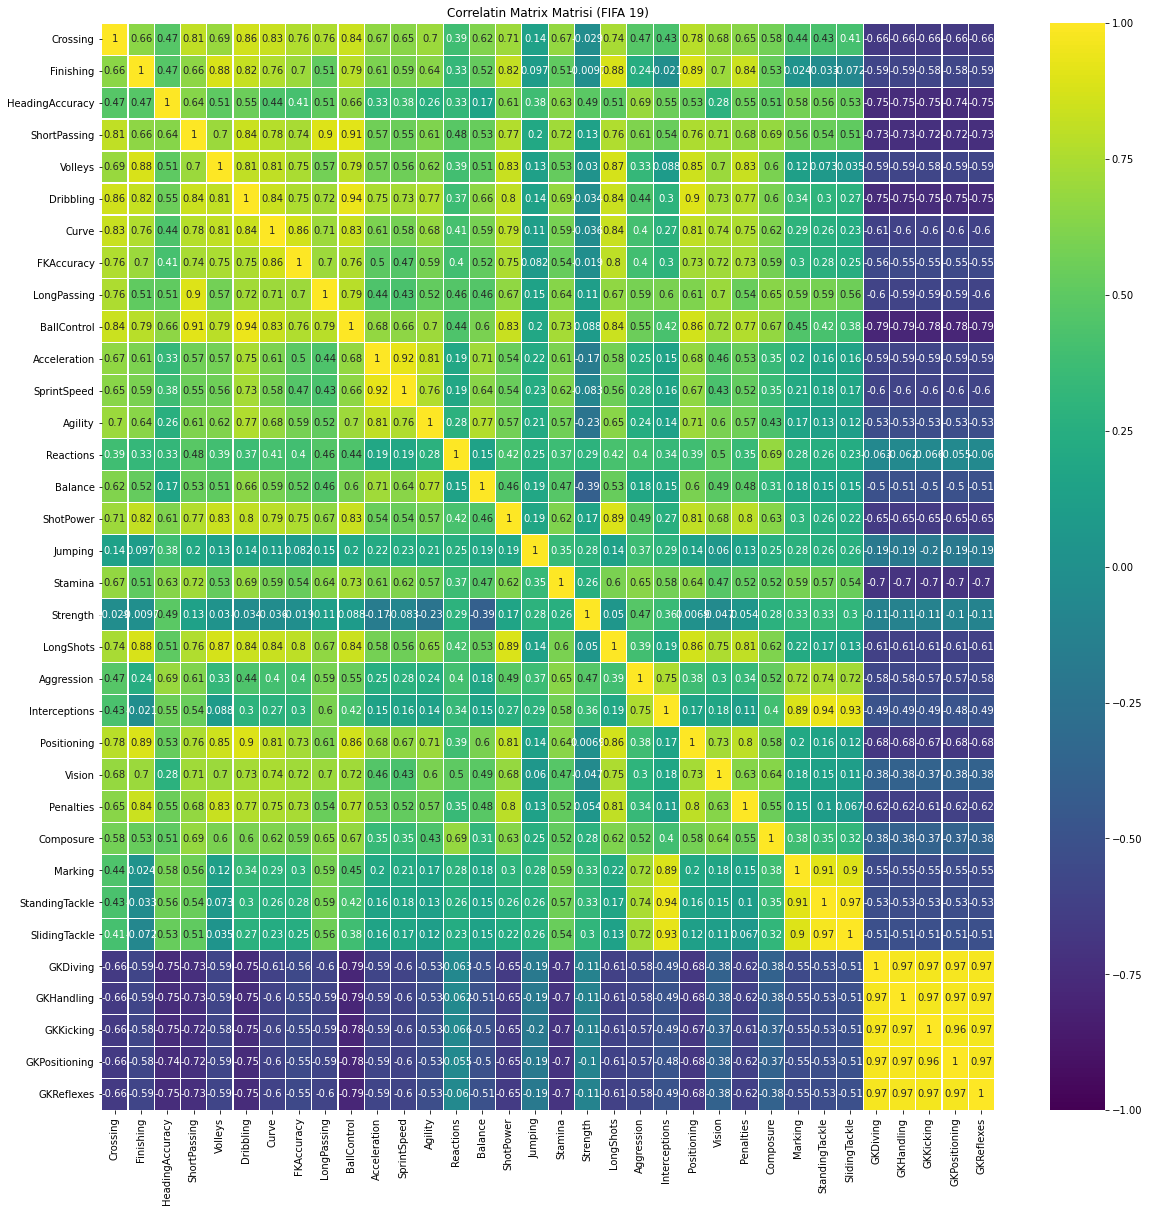

In [5]:
plt.figure(figsize=(20,20))
sns.heatmap(fifa_corr, annot=True, linewidths=.1, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlatin Matrix Matrisi (FIFA 19)")
plt.show()

Now, using *Crossing* ve *Finishing* variables, let's talk about rotation in PCA:

/Users/abdullahkarasan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


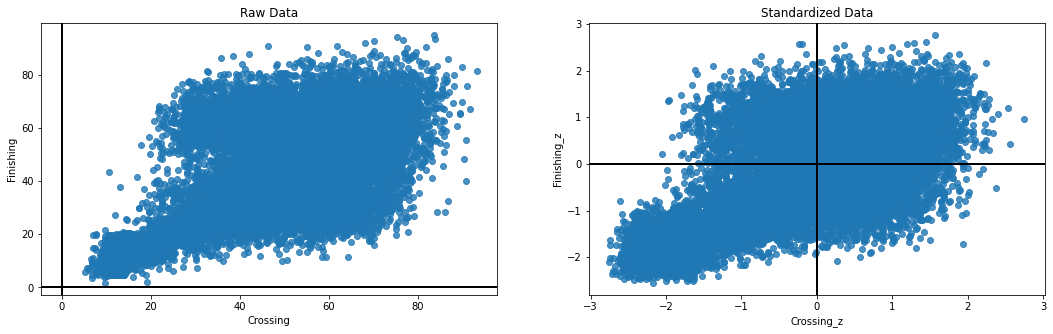

In [6]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)

t = sns.regplot('Crossing', 'Finishing', fifa_df, x_jitter=.49, y_jitter=.49, fit_reg=False)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw Data')

plt.subplot(1,2,2)

fifa_st_df = pd.DataFrame()
fifa_st_df['Crossing_z'] = (fifa_df['Crossing'] - fifa_df['Crossing'].mean()) / fifa_df['Crossing'].std()
fifa_st_df['Finishing_z'] = (fifa_df['Finishing'] - fifa_df['Finishing'].mean()) / fifa_df['Finishing'].std()

t = sns.regplot('Crossing_z','Finishing_z',fifa_st_df, x_jitter=.49, y_jitter=.49, fit_reg=False )
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized Data')
plt.show()

/Users/abdullahkarasan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


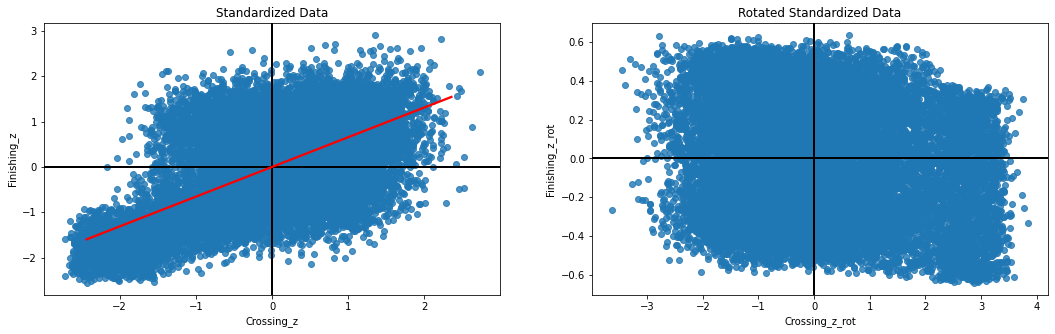

In [7]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)

t = sns.regplot('Crossing_z', 'Finishing_z', fifa_st_df, x_jitter=.49, y_jitter=.49, fit_reg=False)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized Data')

sns.regplot('Crossing_z', 'Finishing_z', fifa_st_df, scatter=False, color="red")

plt.subplot(1,2,2)

fifa_st_df['Crossing_z_rot'] = math.cos(40) * fifa_st_df['Crossing_z'] - math.sin(40) * fifa_st_df['Crossing_z']
fifa_st_df['Finishing_z_rot'] = math.sin(40) * fifa_st_df['Finishing_z'] + math.cos(40) * fifa_st_df['Finishing_z']

t = sns.regplot('Crossing_z_rot','Finishing_z_rot', fifa_st_df, x_jitter=.49, y_jitter=.49,fit_reg=False )
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Rotated Standardized Data')
plt.show()

In the figure above, the horizontal axis is longer than the vertical one, ranging from -4 to 4. The horizontal axis therefore contains more variance and has a higher information value than the vertical axis. If we treat the axes as principal components and discard the vertical vector, each data point is described only by its position on the horizontal axis. Information in the vertical axis of each data point is lost. Because of the rotation, if we remove the vertical axis now, we lose *less than 50%* of the information.

An important aspect of doing PCA is deciding whether the gain of removing a feature from the feature pool is worth the information loss.

##  Mathematics of PCA

Sometimes data are collected on a large number of variables from a single population. With a large number of variables, the dispersion matrix may be too large to study and interpret properly. There would be too many pairwise correlations between the variables to consider. Graphical displays may also not be particularly helpful when the data set is very large. With 12 variables, for example, there will be more than 200 three-dimensional scatterplots.

To interpret the data in a more meaningful form, it is necessary to reduce the number of variables to a few, interpretable linear combinations of the data. Each linear combination will correspond to a principal component.

 \begin{align}
    X &= \begin{bmatrix}
           X_{1} \\
           X_{2} \\
           \vdots \\
           X_{p}
         \end{bmatrix}
  \end{align}

Mathematically speaking, linear combination is the scalar $\lambda$ multiplication of a finite number of vectors. For instance, if V is a vector space. Then,  every v$\in$ V of the form:

$$
v=\lambda_1 x_1+\ldots+\lambda_k x_k=\sum_{i=1}^p\lambda_i x_i \in V
$$

As we discussed in the lesson, rotation is the key concept in PCA and this is done via a vector. More formally, 
a rotation is a linear mapping that rotates a plane by an angle about the origin, i.e., the origin is a fixed point. So, the projection of x on the direction of $e_{i,j}$ where ||e_{i,j}||=1 for a unique solution.

 \begin{align}
    e_i &= \begin{bmatrix}
           e_{i1} \\
           e_{i2} \\
           \vdots \\
           e_{ip}
         \end{bmatrix}
  \end{align}

\begin{equation}
Y_1=e_{11}X_1+e_{12}X_2+...+e_{1p}X_p\\
Y_2=e_{21}X_1+e_{22}X_2+...+e_{2p}X_p\\
.\\
.\\
.\\
Y_p=e_{p1}X_1+e_{p2}X_2+...+e_{pp}X_p\\
\end{equation}

It is obvious that if $Y_1 = e_{i,j}^T\Sigma$ with Cov(x)=$\Sigma$. Then,

## The First Principal Component

The first principal component is the linear combination of X-variables that has maximum variance (among all linear combinations).  It accounts for as much variation in the data as possible.

Specifically we define coefficients $e_{11}$, $e_{12}$,...,$e_{1p}$ for the first component in such a way that its variance is maximized, subject to the constraint that the sum of the squared coefficients is equal to one. This constraint is required so that a unique answer may be obtained.

\begin{equation}
var(Y_i)=\sum_{k=1}^p\sum_{l=1}^p e_{ik}e_{il}\sigma_{kl}=e^T_i \Sigma e_i
\end{equation}

subject to following constraint:
    \begin{equation}
e'_1 \Sigma e_1=\Sigma_{j=1}^p e^2_{1j}=1
    \end{equation}

Writing this as a Langrange problem gives us the following:

\begin{equation}
\text{max } e^T_i \Sigma e_i-\alpha(e^T_i e_i-1)
\end{equation}

Taking derivative with respect to $e_i$ and setting it to equal to 0 we have:

$$2\Sigma e_i-2\alpha e_i=0$$ and thus $$\Sigma e_i=\alpha e_i$$

which holds if $e_i$ is an eigenvector of $\Sigma$ and $\alpha$ the corresponding eigenvalue. Because we want to maximize 

$$e^T_i \Sigma e_i=\alpha e^T_i e_i-1=\alpha$$ since $$e^T_i e_i=1$$

we choose eigenvector with the largest eigenvalue for the variance to be maximum. Therefore the principal component is the eigenvector of the covariance matrix of the input sample with the largest eigenvalue, $\lambda_1=\alpha$

## The Second Principal Components: $Y_2$

The second principal component is the linear combination of x-variables that accounts for as much of the remaining variation as possible, with the constraint that the correlation between the first and second component is 0

Select $e_{21}$, $e_{22}$,...,$e_{2p}$ that maximizes the variance of this new component:
 \begin{equation}
    var(Y_2)=\sum_{k=2}^p\sum_{l=2}^p e_{2k}e_{2l}\sigma_{kl}=e'_2 \Sigma e_2
    \end{equation}
    
subject to the constraint that the sums of squared coefficients add up to one;
    \begin{equation}
e'_2 \Sigma e_2=\Sigma_{j=1}^p e^2_{2j}=1
    \end{equation}

along with the additional constraint that these two components are uncorrelated:
   
   \begin{equation}
cov(Y_1,Y_2)=\Sigma^p_{k=1}\Sigma^p_{l=1}e_{1k}e_{2l}\sigma_{kl}=e_{1}'\Sigma e_{2}=0
    \end{equation}

All subsequent principal components have this same property – they are linear combinations that account for as much of the remaining variation as possible and they are not correlated with the other principal components.

##  Components

In a layman term, when the data is projected into a lower dimension, say three, from a higher space, the three dimensions are nothing but the three Principal Components that captures most of the variance of your data. Variance here represents the information.

Components are eigenvectors divided by square root of eigenvalues. This standardizes the components so that the amount of variance in each variable explained by a component can be compared between the components. For our dimension reduction purposes, components replace factor variables because all components of a particular solution together represent the entire shared variance of the variables. The benefit of PCA is that there are fewer components than variables, thus simplifying the data space. After PCA, we can use components exactly in any analysis as we use the variables.


So, please do not confuse component with feature. Components might represent various features and we there is no one-to-one relationship between component and feature. Long story short, components are no longer features but a combination of them.

Moreover, the principal components are uncorrelated with one another:
        \begin{equation}
        cov(Y_i,Y_j)=0
        \end{equation}

Let $\lambda$ denote the eigenvalues of the variance-covariance matrix . These are ordered so that has the largest eigenvalue and is the smallest.
\begin{equation}
\lambda_1\geq\lambda_2\geq...\geq \lambda_p
\end{equation}

And the vectors
\begin{equation}
e_1,e_2,...,e_p
\end{equation}


The variance for the ith principal component is equal to the ith eigenvalue:
    \begin{equation}
var(Y_i)=var(e_{i1}X_1e_{i2}X_2+...+e_{ip}X_p=\lambda_i
\end{equation}

Proof:
        \begin{equation}
    \Sigma=\mathbb{E}(𝑋𝑋^T)−\mathbb{E}(𝑋)\mathbb{E}(𝑋)^𝑇\\
    e^T\Sigma e=var(e^TX)
    \end{equation}

Since $var(𝑒^𝑇 X)$ is simply a number, so we denote it as $\lambda$, so we have:
        \begin{equation}
            e^T\Sigma e=\lambda
        \end{equation}
Since $e^Te=1$
        \begin{equation}
        ee^t\Sigma e=\Sigma e =\lambda e
        \end{equation}


which means the e that we define in the first place is actually an eigenvector of the  covariance matrix, and the eigenvalue of which is the variance that the data has in that direction. 

We can use the eigenvectors and covariance matrix in `Movie` to calculate the components, but first we have to make a decision.

## Why We Stardardize the Components?

The principal components are supplied with normalized version of original predictors. This is because, the original predictors may have different scales. For example: Imagine a data set with variables’ measuring units as gallons, kilometers, light years etc. It is definite that the scale of variances in these variables will be large.

While applying `StandardScaler`, each feature of your data should be normally distributed such that it will scale the distribution to a mean of zero and a standard deviation of one.

Performing PCA on non-normalized variables will lead to insanely large loadings for variables with high variance. In turn, this will lead to dependence of a principal component on the variable with high variance. This is undesirable.

At this point, it makes sense to introduce two new concepts: `Eigenvalue` and `Eigenvector`

### A Remainder:
If the following equation is satisfied:

\begin{equation}
Av=\lambda v
\end{equation}

where v is the eigenvector and $\lambda$ is the eigenvalue

## Eigenvectors


An eigenvector is the directional aspect of a component–it's the red line in the previous graph. During PCA, the eigenvectors are chosen to be orthogonal, i.e., to have a correlation of 0 with each other. This selection process is done sequentially. First, a vector is found that minimizes the distance between the vector and the datapoints. This vector is the first component. Next, a 2nd vector is found that also minimizes the distance between it and the datapoints, the catch being this 2nd vector must be perpendicular to the 1st vector in 1 of the n-dimensions of the space. This procedure continues until there are n-vectors.


## Eigenvalues


Eigenvalues represent the length of the eigenvectors–each eigenvector has an eigenvalue. The length of the eigenvector encodes the proportion of total variance explained by a component. The total variance is equal to the number of variables in the PCA. Thus, an eigenvalue of 1 means that the component explains the same amount of variance as one variable. An eigenvalue greater than 1 is desirable, since a component with an eigenvalue of 1 adds no value beyond the information contained in any individual variable, and an eigenvalue of less than 1 is actually less efficient at conveying information than a variable by itself. An eigenvalue of 2 means that the component contains an amount of information equal to that of 2 variables. It does not mean that only 2 variables load on that component.

## How Many Components?

The one of the most important decision in PCA is how many components should be kept. PCA actually return the component to us as much as the variables in the correlation matrix. If we have n variables and choose to keep n components, we can reproduce 100% of the information in the original data. On the other hand, we never simplify the situation - we are still interested in the same number of separate pieces of information, expressed as components rather than variables.

There are a few rules that guide us in choosing the number of components to hide. The most obvious is to keep components whose eigenvalues greater than 1 add value (because they contain more information than a single variable). This rule tends to hold more components than ideal.

Another rule is to visualize eigenvalues by linking them with a line from the highest to the lowest in order. This is called the scree plot. After visual inspection, the analyst keep all components whose eigenvalues fall to the point where the slope of the line changes most strongly. Differently, you can keep the components up to a point at which line gets flatter (also called "elbow").

There are many other rules about how many percentage of the variance in the data needs to be explained? There is no clear-cut answer to this question, it depends on your reasons for performing PCA. However, as a general rule of thumb, once the components can account for 80% of the total variance, then you can stop there.

Let's go line by line to run PCA with `movie` data.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [9]:
movie = pd.read_csv("https://bootrain-lms-assets.s3.eu-central-1.amazonaws.com/bootrain-lms-static/datasets/movie.csv")

As PCA work with numerical variables, namely continuous and discrete. It does not necessarily mean that it performs well with discrete variables. So, PCA is designed for continuous variables. However, `Movie` data includes object variables that needs to be sort out.

In [10]:
movie_df=movie.select_dtypes(exclude='object')
movie_df.dropna(inplace=True)

First, we check the number of columns we have in `movie`data after cleaning.

In [11]:
len(movie_df.columns)

16

In order to process our data, we need to convert it into array:

In [12]:
X = movie_df.values

Let's try to run PCA with all the variables at our disposal:

In [13]:
X = StandardScaler().fit_transform(movie_df)
pca = PCA(n_components=16)
principalComponents=pca.fit_transform(X)

In [14]:
exp_var= pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(exp_var)
print(cumsum_var)

[2.77862794e-01 1.33524266e-01 9.35476570e-02 6.56904385e-02
 6.33657995e-02 6.22373134e-02 5.51925574e-02 5.41200347e-02
 4.88183505e-02 3.69472195e-02 3.01931440e-02 2.76999706e-02
 2.59820982e-02 1.53431154e-02 9.36453700e-03 1.10704753e-04]
[27.79 41.14 50.49 57.06 63.4  69.62 75.14 80.55 85.43 89.12 92.14 94.91
 97.51 99.04 99.98 99.99]


This values show that the first principal component `PC1` explains 27.82% of the variation in the original data while the second principal component `PC2` explains 13.39% of the variation in the original data. Below is given the scree plot. What we see is that the line is getting flatter as the number of components increase. As soon as we use 16 components, we are able to account for 100% of the variance in the movie data.

Now, you see the scree plot below,  which is nothing but plot of eigenvalues (cumulative sum of explained_variance_) for each of the components.

Text(0, 0.5, '% of Variance Explained')

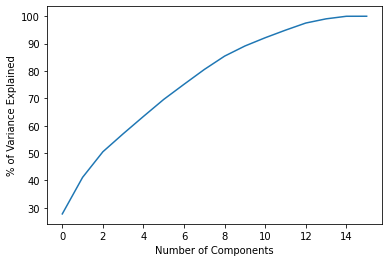

In [15]:
plt.plot(cumsum_var)
plt.xlabel('Number of Components')
plt.ylabel('% of Variance Explained')

As we readily observe that after the 8th component, the contribution of the component to the variance explained drops to less than 5%. So, we can ignore these components and focus on the first 8 components:

In [16]:
X = StandardScaler().fit_transform(movie_df)
pca = PCA(n_components=8)
principalComponents=pca.fit_transform(X)

In [17]:
exp_var= pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(exp_var)
print(cumsum_var)

[0.27786279 0.13352427 0.09354766 0.06569044 0.0633658  0.06223731
 0.05519256 0.05412003]
[27.79 41.14 50.49 57.06 63.4  69.62 75.14 80.55]


To be interpret, first and second principal components explain nearly 41% of the total variance and first 8 components explain over 80% of the total variance in `movie` data. Let's visualize it via `cumulative scree plot`.

Text(0, 0.5, '% of Variance Explained')

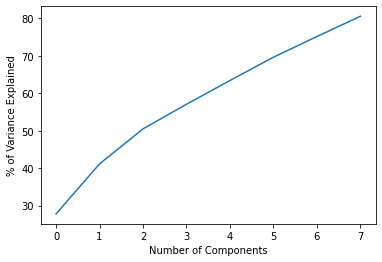

In [18]:
plt.plot(cumsum_var)
plt.xlabel('Number of Components')
plt.ylabel('% of Variance Explained')

Or, we can visualize scree plot in a different way. This time scree plot is used to access components which explains the most of variability in the data. It represents values in descending order.

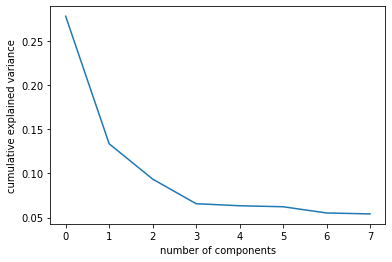

In [19]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Accordingly, the first principal component explains over 25% of the variance, second one accounts for nearly 13% of the variance and son on.

Additionally, `explained_variance_ plot` can be used to visualize the contribution of the components to the explained variance by bar plot. This is exactly the same story with different visualization.

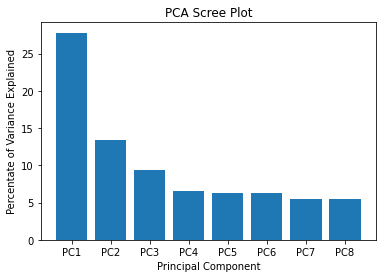

In [20]:
# Scree Plot
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8']
plt.bar(x= range(1,9), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

Last but not least, we introduce biplot, which is quite important to grasp the relationships between features and components. This graph tells us that features have positively correlated with principal component 1 but the magnitude of the correlation varies depending on the features. For instance, `actor_3_facebook_likes` has highest correlation with `PC1` but `facenumber_in_poster` has the lowest.

On the other hand, while some features have positive correlation with `PC2`, some do not. For example, `actor_3_facebook_likes` has positively correlated with the `PC2` but it is not the case for `movie_facebook_like`. So, in order to detect the relationships between features and principal components, biplot is a perfect tool.

In [21]:
X = pd.DataFrame(X, columns=movie_df.columns)

In [22]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    fig = plt.figure(figsize=(12,6), dpi=100)
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()


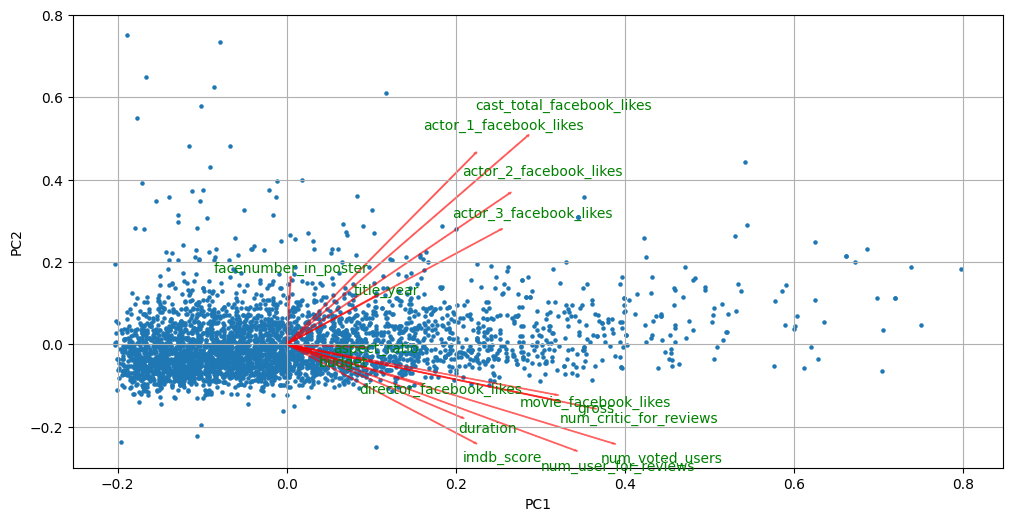

In [23]:
myplot(np.array(X)[:,0:2],np.transpose(pca.components_[0:2, :]),list(X.columns))
plt.show()

## Measuring Liquidity

In [53]:
pd.set_option('use_inf_as_na', True)

In [24]:
liq_data = pd.read_csv('bid_ask.csv')

In [25]:
liq_data.head()

,Unnamed: 0,Date,EXCHCD,TICKER,COMNAM,BIDLO,ASKHI,PRC,VOL,RET,SHROUT,OPENPRC,vwretx
0,1031570,2019-01-02,3.0,INTC,INTEL CORP,45.77,47.470,47.08,18761673.0,0.003196,4564000.0,45.960,0.001783
1,1031571,2019-01-03,3.0,INTC,INTEL CORP,44.39,46.280,44.49,32254097.0,-0.055013,4564000.0,46.150,-0.021219
2,1031572,2019-01-04,3.0,INTC,INTEL CORP,45.54,47.570,47.22,35419836.0,0.061362,4564000.0,45.835,0.033399
3,1031573,2019-01-07,3.0,INTC,INTEL CORP,46.75,47.995,47.44,22724997.0,0.004659,4564000.0,47.100,0.009191
4,1031574,2019-01-08,3.0,INTC,INTEL CORP,46.78,48.030,47.74,22721240.0,0.006324,4564000.0,47.800,0.010240


In [26]:
rolling_five = []

for j in liq_data.TICKER.unique():
    for i in range(len(liq_data[liq_data.TICKER == j])):
        rolling_five.append(liq_data[i:i+5].agg({'BIDLO': 'min',
                                                'ASKHI': 'max',
                                                 'VOL': 'sum',
                                                 'SHROUT': 'mean',
                                                 'PRC': 'mean'}))

In [27]:
rolling_five_df = pd.DataFrame(rolling_five)
rolling_five_df.columns = ['bidlo_min', 'askhi_max', 'vol_sum',
                           'shrout_mean', 'prc_mean']
liq_vol_all = pd.concat([liq_data,rolling_five_df], axis=1)

## Volume Based Measure

In [28]:
liq_ratio = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        liq_ratio.append((liq_vol_all['PRC'][i+1:i+6] * 
                          liq_vol_all['VOL'][i+1:i+6]).sum()/
                         (np.abs(liq_vol_all['PRC'][i+1:i+6].mean() - 
                                 liq_vol_all['PRC'][i:i+5].mean())))

In [29]:
Lhh = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        Lhh.append((liq_vol_all['PRC'][i:i+5].max() - 
                    liq_vol_all['PRC'][i:i+5].min()) /  
                   liq_vol_all['PRC'][i:i+5].min() /  
                   (liq_vol_all['VOL'][i:i+5].sum() / 
                    liq_vol_all['SHROUT'][i:i+5].mean() * 
                    liq_vol_all['PRC'][i:i+5].mean()))

In [30]:
turnover_ratio = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        turnover_ratio.append((1/liq_vol_all['VOL'].count()) * 
                              (np.sum(liq_vol_all['VOL'][i:i+1]) / 
                               np.sum(liq_vol_all['SHROUT'][i:i+1])))

In [31]:
liq_vol_all['liq_ratio'] = pd.DataFrame(liq_ratio)
liq_vol_all['Lhh'] = pd.DataFrame(Lhh)
liq_vol_all['turnover_ratio'] = pd.DataFrame(turnover_ratio)

## Transaction Cost Based Measures

### Bid-Ask Spreads

In [32]:
liq_vol_all['mid_price'] = (liq_vol_all.ASKHI + liq_vol_all.BIDLO) / 2
liq_vol_all['percent_quoted_ba'] = (liq_vol_all.ASKHI - 
                                    liq_vol_all.BIDLO) / \
                                    liq_vol_all.mid_price
liq_vol_all['percent_effective_ba'] = 2 * abs((liq_vol_all.PRC - 
                                               liq_vol_all.mid_price)) / \
                                               liq_vol_all.mid_price

### Roll's Spread

In [33]:
liq_vol_all['price_diff'] = liq_vol_all.groupby('TICKER')['PRC']\
                            .apply(lambda x:x.diff())
liq_vol_all.dropna(inplace=True)
roll = []

for j in liq_vol_all.TICKER.unique():
     for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        roll_cov = np.cov(liq_vol_all['price_diff'][i:i+5], 
                          liq_vol_all['price_diff'][i+1:i+6])
        if roll_cov[0,1] < 0:
            roll.append(2 * np.sqrt(-roll_cov[0, 1]))
        else:
             roll.append(2 * np.sqrt(np.abs(roll_cov[0, 1])))


### Corwin and Schultz (2012)

In [34]:
gamma = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        gamma.append((max(liq_vol_all['ASKHI'].iloc[i+1], 
                          liq_vol_all['ASKHI'].iloc[i]) - 
                      min(liq_vol_all['BIDLO'].iloc[i+1], 
                          liq_vol_all['BIDLO'].iloc[i])) ** 2)
        gamma_array = np.array(gamma)

In [35]:
beta = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        beta.append((liq_vol_all['ASKHI'].iloc[i+1] - 
                     liq_vol_all['BIDLO'].iloc[i+1]) ** 2 + 
                    (liq_vol_all['ASKHI'].iloc[i] - 
                     liq_vol_all['BIDLO'].iloc[i]) ** 2)
        beta_array = np.array(beta)

In [36]:
alpha = ((np.sqrt(2 * beta_array) - np.sqrt(beta_array)) / 
       (3 - (2 * np.sqrt(2)))) - np.sqrt(gamma_array / 
                                         (3 - (2 * np.sqrt(2))))
CS_spread = (2 * np.exp(alpha - 1)) / (1 + np.exp(alpha))

In [37]:
liq_vol_all = liq_vol_all.reset_index()
liq_vol_all['roll'] = pd.DataFrame(roll)
liq_vol_all['CS_spread'] = pd.DataFrame(CS_spread)

## Price Based Measures

In [38]:
dvol = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        dvol.append((liq_vol_all['PRC'][i:i+5] *
                     liq_vol_all['VOL'][i:i+5]).sum())
liq_vol_all['dvol'] = pd.DataFrame(dvol)

In [39]:
amihud = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        amihud.append((1 / liq_vol_all['RET'].count()) * 
                      (np.sum(np.abs(liq_vol_all['RET'][i:i+1])) / 
                              np.sum(liq_vol_all['dvol'][i:i+1])))

In [40]:
florackis = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        florackis.append((1 / liq_vol_all['RET'].count()) * 
                         (np.sum(np.abs(liq_vol_all['RET'][i:i+1]) / 
                                 liq_vol_all['turnover_ratio'][i:i+1])))

In [41]:
liq_vol_all['vol_diff_pct'] = liq_vol_all.groupby('TICKER')['VOL']\
                              .apply(lambda x: x.diff()).pct_change()
liq_vol_all['price_diff_pct'] = liq_vol_all.groupby('TICKER')['PRC']\
                              .apply(lambda x: x.diff()).pct_change()

In [42]:
cet = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        cet.append(np.sum(liq_vol_all['vol_diff_pct'][i:i+1])/
                   np.sum(liq_vol_all['price_diff_pct'][i:i+1]))

In [43]:
liq_vol_all['amihud'] = pd.DataFrame(amihud)
liq_vol_all['florackis'] = pd.DataFrame(florackis)
liq_vol_all['cet'] = pd.DataFrame(cet)

## Market Impact Measures

In [44]:
import statsmodels.api as sm

In [45]:
liq_vol_all['VOL_pct_change'] = liq_vol_all.groupby('TICKER')['VOL']\
                                .apply(lambda x: x.pct_change())
liq_vol_all.dropna(subset=['VOL_pct_change'], inplace=True)
liq_vol_all = liq_vol_all.reset_index()

In [46]:
unsys_resid = []

for i in liq_vol_all.TICKER.unique():
    X1 = liq_vol_all[liq_vol_all['TICKER'] == i]['vwretx']
    y = liq_vol_all[liq_vol_all['TICKER'] == i]['RET']
    ols = sm.OLS(y, X1).fit()
    unsys_resid.append(ols.resid)

In [47]:
market_impact = {}

for i, j in zip(liq_vol_all.TICKER.unique(), 
                range(len(liq_vol_all['TICKER'].unique()))):
    X2 = liq_vol_all[liq_vol_all['TICKER'] == i]['VOL_pct_change']
    ols = sm.OLS(unsys_resid[j] ** 2, X2).fit()
    print('***' * 30)
    print(f'OLS Result for {i}')
    print(ols.summary())
    market_impact[j] = ols.resid

******************************************************************************************
OLS Result for INTC
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.156
Model:                            OLS   Adj. R-squared (uncentered):              0.153
Method:                 Least Squares   F-statistic:                              46.13
Date:                Fri, 19 Nov 2021   Prob (F-statistic):                    8.09e-11
Time:                        00:21:03   Log-Likelihood:                          1451.0
No. Observations:                 250   AIC:                                     -2900.
Df Residuals:                     249   BIC:                                     -2897.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
         

In [48]:
append1 = market_impact[0].append(market_impact[1])
liq_vol_all['market_impact'] = append1.append(market_impact[2])

In [49]:
cols = ['vol_diff_pct', 'price_diff_pct', 'price_diff',
        'VOL_pct_change', 'dvol', 'mid_price']
liq_measures_all = liq_vol_all.drop(liq_vol_all[cols], axis=1)\
                   .iloc[:, -11:]

In [52]:
liq_measures_all2.max()

liq_ratio                        inf
Lhh                     5.824148e-04
turnover_ratio          2.542853e-02
percent_quoted_ba       5.545110e-02
percent_effective_ba    4.656669e-02
roll                    4.178873e+00
CS_spread               5.877726e-01
amihud                  1.315566e-14
florackis               7.838487e-03
cet                              inf
market_impact           8.177570e-03
dtype: float64

In [54]:
liq_measures_all2 = liq_measures_all.dropna()
scaled_liq = StandardScaler().fit_transform(liq_measures_all2)

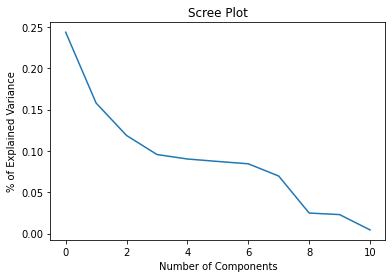

In [55]:
pca = PCA(n_components=11)
components = pca.fit_transform(scaled_liq)
plt.plot(pca.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('% of Explained Variance')
plt.show()

In [56]:
pca = PCA(n_components=3)
components = pca.fit_transform(scaled_liq)

In [57]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)


In [59]:
loadings

array([[ 0.11523106, -0.11829908, -0.17348857],
       [-0.20669298,  0.88224647, -0.1225665 ],
       [ 0.60052239, -0.00896225,  0.03451949],
       [ 0.71374636,  0.1333127 ,  0.55150209],
       [ 0.63937284,  0.14905254,  0.52541382],
       [-0.06104667,  0.88661309, -0.06932059],
       [ 0.01161381, -0.30827501, -0.04623918],
       [ 0.84646969, -0.02254466, -0.49717938],
       [ 0.70665162,  0.08277192, -0.6047537 ],
       [-0.03594482,  0.1028197 , -0.00644434],
       [ 0.35767482,  0.09200994,  0.24779775]])

In [62]:
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3']
                              , index=liq_measures_all.columns)
loading_matrix

,PC1,PC2,PC3
liq_ratio,0.115231,-0.118299,-0.173489
Lhh,-0.206693,0.882246,-0.122567
turnover_ratio,0.600522,-0.008962,0.034519
percent_quoted_ba,0.713746,0.133313,0.551502
percent_effective_ba,0.639373,0.149053,0.525414
roll,-0.061047,0.886613,-0.069321
CS_spread,0.011614,-0.308275,-0.046239
amihud,0.846470,-0.022545,-0.497179
florackis,0.706652,0.082772,-0.604754
cet,-0.035945,0.102820,-0.006444
